# IRIS - Connection II

![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [6]:
iris = load_iris()
x = iris.data
y = iris.target

df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [7]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2022)

## **sepal끼리, petal끼리**

In [8]:
df_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [28]:
tr_x_se = train_x.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
tr_x_pe = train_x.loc[:, ['petal length (cm)', 'petal width (cm)']]
te_x_se = test_x.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
te_x_pe = test_x.loc[:, ['petal length (cm)', 'petal width (cm)']]

tr_x_se.shape, tr_x_pe.shape

((120, 2), (120, 2))

## One-hot Encoding

In [11]:
class_n = len(np.unique(train_y))
class_n

3

In [12]:
from tensorflow.keras.utils import to_categorical

train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

## Modeling : multi-input & Add layer

In [18]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

In [40]:
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 사슬 엮기
il_l = keras.layers.Input(shape=(2, ))
hl_l = keras.layers.Dense(4)(il_l)

il_w = keras.layers.Input(shape=(2, ))
hl_w = keras.layers.Dense(4)(il_w)

al = keras.layers.Add()([il_l, il_w])
ol = keras.layers.Dense(3, activation='softmax')(al)

# 3. 시작점 끝점 연결
model = keras.models.Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# layer 짝을 맞춰야 add 사용 가능(동일한 특징으로 보고 진행)

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 add (Add)                      (None, 2)            0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 3)            9           ['add[0][0]']                

## 모델 시각화

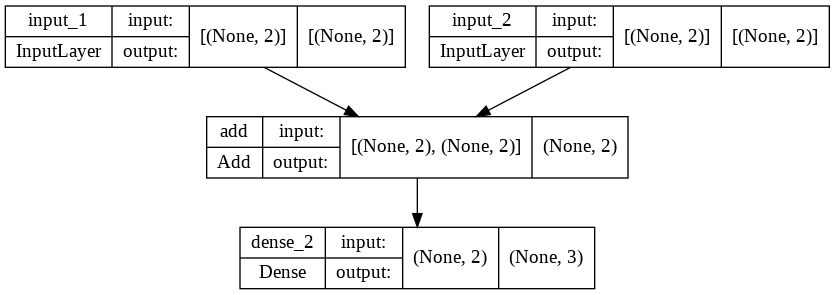

In [42]:
plot_model(model, show_shapes=True, show_layer_names=True)

## 학습 시켜보기!

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

model.fit([tr_x_se, tr_x_pe], train_y, epochs=1000, validation_split=0.1, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 58ms/step - loss: 3.5744 - accuracy: 0.3704 - val_loss: 4.8733 - val_accuracy: 0.1667
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 3.5093 - accuracy: 0.3704 - val_loss: 4.7899 - val_accuracy: 0.1667
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 3.4449 - accuracy: 0.3704 - val_loss: 4.7073 - val_accuracy: 0.1667
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 3.3814 - accuracy: 0.3704 - val_loss: 4.6260 - val_accuracy: 0.1667
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 3.3207 - accuracy: 0.3704 - val_loss: 4.5446 - val_accuracy: 0.1667
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 3.2583 - accuracy: 0.3704 - val_loss: 4.4645 - val_accuracy: 0.1667
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 3.1958 - accuracy: 0.3704 - val_loss: 4.3849 - val_accuracy: 0.1667
Epoch 8/1000


In [44]:
from sklearn.metrics import accuracy_score

In [30]:
y_pred = model.predict([te_x_se, te_x_pe])

accuracy_score(y_pred.argmax(axis=1), test_y.argmax(axis=1))

0.8333333333333334